In [1]:
import pandas as pd 
import seaborn as sns
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)


NameError: name 'pd' is not defined

In [3]:
print(os.getcwd())

/Users/matheus/Projects/steam_analysis/steam-analysis/notebooks/modeling


In [4]:
os.chdir('../../')

In [5]:
data = pd.read_csv('data/interim/steam-transformed-data.csv')

In [6]:
data = data[data['year']>=2023]

In [7]:
data[['Achievements', 'about_length',
       'n_screens', 'n_movies', 'n_tags', 'n_languages', 'has_publisher',
       'perceived_quality', 'has_support_email', 'has_support_url', 'has_website', 'month', 'day',
       'year']]

,Achievements,about_length,n_screens,n_movies,n_tags,n_languages,has_publisher,perceived_quality,has_support_email,has_support_url,has_website,month,day,year
61080,0,1958,5,1,1,2,False,0.0,True,False,False,12,31,2023
62425,0,928,9,1,1,1,False,0.0,True,False,False,4,14,2025
63219,0,862,5,1,1,1,False,0.0,True,False,False,1,1,2023
63252,14,2041,6,1,1,2,False,0.0,True,False,False,1,1,2023
63259,0,621,5,1,1,1,False,0.0,True,False,False,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78585,0,988,5,1,1,2,True,0.0,True,False,False,1,2,2024
78586,0,760,5,1,1,1,False,0.0,True,False,False,1,3,2024
78587,0,1165,5,1,1,1,False,0.0,False,True,False,1,4,2024
78588,34,592,15,2,1,1,False,0.0,True,True,True,1,8,2024


In [17]:
data['random_noise'] = np.random.randn(len(data))

In [27]:

# Replace 'target' with the name of your target variable
X = data[['Achievements', 'about_length',
       'n_screens', 'n_movies', 'n_tags', 'n_languages', 'has_publisher',
       'perceived_quality', 'has_support_email', 'has_support_url', 'has_website', 'month', 'day',
       'year', 'random_noise']]
y = data['success_500_threshold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Function to evaluate classifiers
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    results[clf_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# # Add a Neural Network classifier
# def build_nn(input_dim):
#     model = Sequential()
#     model.add(Dense(64, input_dim=input_dim, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Preprocess data for Neural Network
# X_train_nn = X_train.values
# X_test_nn = X_test.values
# y_train_nn = y_train.values
# y_test_nn = y_test.values

# # Build and train the Neural Network
# nn_model = build_nn(X_train.shape[1])
# nn_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, verbose=0)
# y_pred_nn = (nn_model.predict(X_test_nn) > 0.5).astype("int32")

# # Evaluate the Neural Network
# accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)
# precision_nn = precision_score(y_test_nn, y_pred_nn)
# recall_nn = recall_score(y_test_nn, y_pred_nn)
# f1_nn = f1_score(y_test_nn, y_pred_nn)

# results['Neural Network'] = {
#     'Accuracy': accuracy_nn,
#     'Precision': precision_nn,
#     'Recall': recall_nn,
#     'F1 Score': f1_nn
# }

# # Print the results
# results_df = pd.DataFrame(results).T
# print(results_df)


/Users/matheus/miniconda3/envs/steam_analysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
results

{'Logistic Regression': {'Accuracy': 0.9808714133900106,
  'Precision': 0.45454545454545453,
  'Recall': 0.09433962264150944,
  'F1 Score': 0.15625},
 'Decision Tree': {'Accuracy': 0.9613885936946511,
  'Precision': 0.16666666666666666,
  'Recall': 0.2641509433962264,
  'F1 Score': 0.20437956204379562},
 'Random Forest': {'Accuracy': 0.9819341126461212,
  'Precision': 0.625,
  'Recall': 0.09433962264150944,
  'F1 Score': 0.16393442622950818},
 'Gradient Boosting': {'Accuracy': 0.983705278072972,
  'Precision': 0.6206896551724138,
  'Recall': 0.33962264150943394,
  'F1 Score': 0.43902439024390244},
 'Support Vector Machine': {'Accuracy': 0.9812256464753808,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0},
 'K-Nearest Neighbors': {'Accuracy': 0.9801629472192703,
  'Precision': 0.2857142857142857,
  'Recall': 0.03773584905660377,
  'F1 Score': 0.06666666666666667},
 'Naive Bayes': {'Accuracy': 0.9312787814381863,
  'Precision': 0.17209302325581396,
  'Recall': 0.6981132075471698,


In [29]:
data['success_500_threshold'].sum() / len(data['success_500_threshold'])

0.01998157726918444

In [52]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)


In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [54]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [37]:
# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV with precision scoring
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best precision score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate precision on the test set
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Precision (Cross-Validation):", best_precision)
print("Precision on Test Set with Best Model:", precision_test)

/Users/matheus/miniconda3/envs/steam_analysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matheus/miniconda3/envs/steam_analysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matheus/miniconda3/envs/steam_analysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Precision (Cross-Validation): 0.8928571428571429
Precision on Test Set with Best Model: 0.7142857142857143


In [55]:
precision

0.75

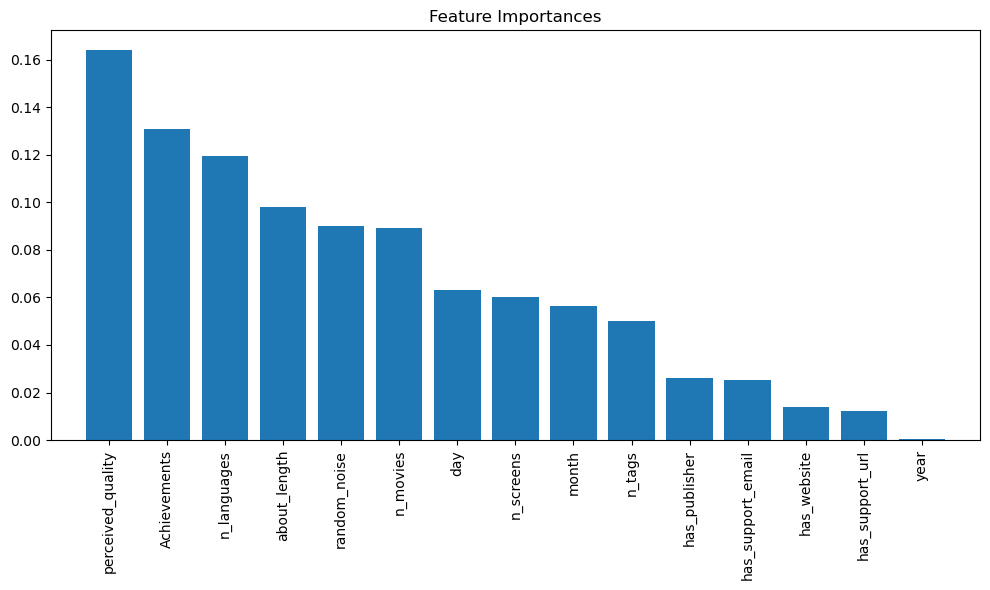

In [56]:

# Retrieve feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()